# **1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# **📌 2: Load MNIST CSV Dataset**


In [2]:
train_data = pd.read_csv('/content/mnist_train.csv')
test_data  = pd.read_csv('/content/mnist_test.csv')

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)




Train shape: (60000, 785)
Test shape: (10000, 785)


# **📌  3: Separate Features and Labels**

In [3]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']



# **📌  4: Normalize Pixel Values (Preprocessing)**

In [5]:

# Normalize pixel values from 0–255 to 0–1
X_train = X_train / 255.0
X_test  = X_test / 255.0





# **📌 5: Visualize Sample Handwritten Digits**


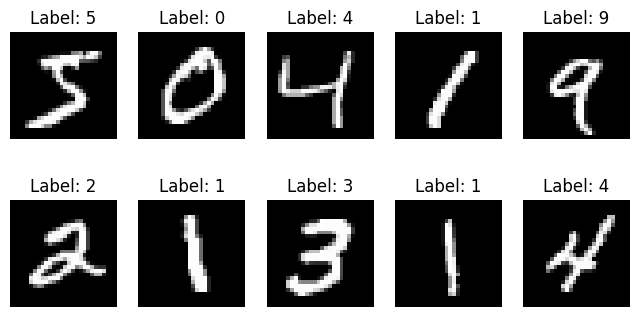

In [6]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.show()

# **📌 6: Train Machine Learning Model (Logistic Regression)   **
(Best for low memory systems)

In [7]:
model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

**📌 7: Make Predictions**

In [8]:
y_pred = model.predict(X_test)


# **8: Evaluate Model Performance**

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9262


# **9: Classification Report**

In [10]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# **10: Confusion Matrix**

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
cm


Confusion Matrix:



array([[ 958,    0,    1,    3,    1,    9,    4,    3,    1,    0],
       [   0, 1110,    5,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  931,   16,   10,    3,   12,    9,   32,    4],
       [   4,    1,   17,  923,    1,   24,    2,   10,   21,    7],
       [   1,    3,    8,    3,  922,    0,    5,    4,    6,   30],
       [   9,    2,    3,   35,    9,  778,   15,    6,   31,    4],
       [   8,    3,    8,    2,    7,   16,  911,    2,    1,    0],
       [   1,    7,   23,    7,    6,    1,    0,  949,    3,   31],
       [  10,   11,    6,   20,    8,   28,   14,   10,  855,   12],
       [   9,    7,    1,    9,   22,    7,    0,   21,    8,  925]])